In [1]:
#Importing packages

#!pip3 install sympy
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

# For cleaner outputs
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Output of Matlab code

def s_1(t):
    return (5.6232 + 1.1941j)/t
def s_2(t):
    return (5.0894 + 3.5888j)/t
def s_3(t):
    return (3.9934 + 6.0049j)/t
def s_4(t):
    return (2.2698 + 8.4618j)/t
def s_5(t):
    return (-0.2087 +10.9913j)/t
def s_6(t):
    return (-3.7032 +13.6564j)/t
def s_7(t):
    return (-8.8977 +16.6310j)/t

f_1= 1.0*10**2* (-0.2788 - 1.0215j)
f_3= 1.0*10**2* (0.4694 + 0.4565j)
f_5= 1.0*10**2* (-0.2350 - 0.0581j)
f_7= 1.0*10**2* (0.0481 - 0.0132j)
f_9= 1.0*10**2* (-0.0038 + 0.0034j)
f_11= 1.0*10**2* (0.0001 - 0.0002j)
f_13= 1.0*10**2* (-0.0000 + 0.0000j)

In [3]:
#Input variables

R=250 
R_P=17.78*10**(3)
D_e=6.4*10**(2) 
D_i=(1/52)*D_e 
c_e=2 

r_steps_inside=np.arange(0, R+1, 1)
t_steps=np.arange(0,61,1)

In [4]:
#Definitions

def A_1(r,s_k):
    return -(R**2*np.sinh(r*np.sqrt(s_k/D_i)))/(r*D_i*(np.cosh(np.sqrt(s_k/D_i)*R)*R*np.sqrt(s_k/D_i)-np.sinh(R*np.sqrt(s_k/D_i))))
    
def A_2(r,s_k):
    return (R**2*(np.sqrt(s_k/D_e)*R_P*np.cosh(np.sqrt(s_k/D_e)*(r-R_P))+np.sinh(np.sqrt(s_k/D_e)*(r-R_P))))/(r*(D_e*np.sqrt(s_k/D_e)*(R_P-R)*np.cosh(np.sqrt(s_k/D_e)*(R_P-R))+(s_k*R_P*R-D_e)*np.sinh(np.sqrt(s_k/D_e)*(R_P-R))))

def inverse(r,t):
    if t==0:
        if r <= R:
            return 0
        else:
            return c_e
    else:
        if r > R:
            return c_e-(2*((f_1*A_2(r,s_1(t))*(c_e/s_1(t))/(t*(A_1(r,s_1(t))-A_2(r,s_1(t)))))+\
                (f_3*A_2(r,s_2(t))*(c_e/s_2(t))/(t*(A_1(r,s_2(t))-A_2(r,s_2(t)))))+\
                (f_5*A_2(r,s_3(t))*(c_e/s_3(t))/(t*(A_1(r,s_3(t))-A_2(r,s_3(t)))))+\
                (f_7*A_2(r,s_4(t))*(c_e/s_4(t))/(t*(A_1(r,s_4(t))-A_2(r,s_4(t)))))+\
                (f_9*A_2(r,s_5(t))*(c_e/s_5(t))/(t*(A_1(r,s_5(t))-A_2(r,s_5(t)))))+\
                (f_11*A_2(r,s_6(t))*(c_e/s_6(t))/(t*(A_1(r,s_6(t))-A_2(r,s_6(t)))))+\
                (f_13*A_2(r,s_7(t))*(c_e/s_7(t))/(t*(A_1(r,s_7(t))-A_2(r,s_7(t)))))).real)
        else:
            return (-2)*((f_1*A_1(r,s_1(t))*(c_e/s_1(t))/(t*(A_1(r,s_1(t))-A_2(r,s_1(t)))))+\
    (f_3*A_1(r,s_2(t))*(c_e/s_2(t))/(t*(A_1(r,s_2(t))-A_2(r,s_2(t)))))+\
    (f_5*A_1(r,s_3(t))*(c_e/s_3(t))/(t*(A_1(r,s_3(t))-A_2(r,s_3(t)))))+\
    (f_7*A_1(r,s_4(t))*(c_e/s_4(t))/(t*(A_1(r,s_4(t))-A_2(r,s_4(t)))))+\
    (f_9*A_1(r,s_5(t))*(c_e/s_5(t))/(t*(A_1(r,s_5(t))-A_2(r,s_5(t)))))+\
    (f_11*A_1(r,s_6(t))*(c_e/s_6(t))/(t*(A_1(r,s_6(t))-A_2(r,s_6(t)))))+\
    (f_13*A_1(r,s_7(t))*(c_e/s_7(t))/(t*(A_1(r,s_7(t))-A_2(r,s_7(t)))))).real    

In [5]:
#Running the model for every r and t

sol=np.zeros((r_steps_inside.size,t_steps.size))

for (i,r) in enumerate(r_steps_inside):
    for (j,t) in enumerate(t_steps):
        sol[i,j]=inverse(r,t) 

In [6]:
# Advanced model - Concentration in cells

D=6.6*10**(2) 
kon=0.145
Ctot=2

Steps = 61
step_size= 1
timesteps=np.arange(1,Steps,step_size)


pH_normal = np.linspace(6.8, 7.4, len(r_steps_inside))
uncharged_coef_normal=np.zeros((len(r_steps_inside),1))
uncharged_coef_normal=1-((10**(pH_normal-8.36))/(1+10**(pH_normal-8.36)))

pH_lowcenter = np.linspace(5, 7.4, len(r_steps_inside))
uncharged_coef_lowcenter=np.zeros((len(r_steps_inside),1))
uncharged_coef_lowcenter=1-((10**(pH_lowcenter-8.36))/(1+10**(pH_lowcenter-8.36)))

pH_verylowcenter = np.linspace(1, 7.4, len(r_steps_inside))
uncharged_coef_verylowcenter=np.zeros((len(r_steps_inside),1))
uncharged_coef_verylowcenter=1-((10**(pH_verylowcenter-8.36))/(1+10**(pH_verylowcenter-8.36)))


Coc_vector=np.zeros((len(r_steps_inside),len(timesteps)))
Cdrug_vector=np.zeros((len(r_steps_inside),len(timesteps)))


def derivative(Q,Coc, int_Ui):
    first_val = -kon*Coc #*(Ctot-Coc)
    second_val = (kon*Q/D)*int_Ui #*(Ctot-Coc)
    third_val = Q/D*np.log((Ctot-Coc)/Ctot) #*(Ctot-Coc)
    return (first_val + second_val + third_val)*(Ctot-Coc)

for (k,r) in enumerate(r_steps_inside):
    Q=((10**3)/60)*((10**(0.6316*0.15*pH_normal[k]-0.3143))/(4*np.pi*(7.5**2)))
    
    for (i,t) in enumerate(timesteps):
        if i==0:
            continue
        Coc = Coc_vector[k,i-1]
        t_for_int = timesteps[:(i-1)]
        int_Ui=0
        for j in t_for_int:
            if pd.isna(sol[r,j]):
                sol[r,j]=0
            int_Ui=int_Ui+j*(uncharged_coef_normal[k]*sol[r,j])
        Coc_vector[k,i]=Coc+step_size*derivative(Q,Coc, int_Ui)
        Cdrug_vector[k,i]=-Coc_vector[k,i]+Q/D*int_Ui+(Q/(D*kon))*np.log((Ctot-Coc_vector[k,i])/Ctot)

## Plotting the results

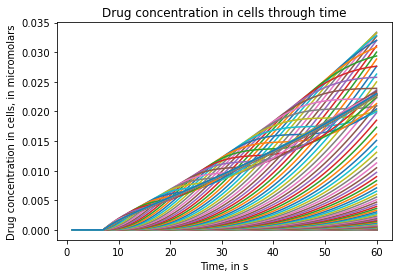

In [9]:
for i in range(Cdrug_vector.shape[0]):
    plt.plot(timesteps, Cdrug_vector[i,])
    
plt.xlabel('Time, in s')
plt.ylabel('Drug concentration in cells, in micromolars')
plt.title('Drug concentration in cells through time')
#plt.savefig('Cdrug_time.png')
plt.show()

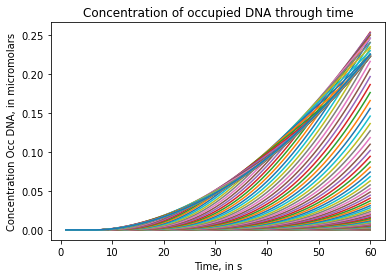

In [10]:
for i in range(Coc_vector.shape[0]):
    plt.plot(timesteps, Coc_vector[i,])
    
plt.xlabel('Time, in s')
plt.ylabel('Concentration Occ DNA, in micromolars')
plt.title('Concentration of occupied DNA through time')
#plt.savefig('Coc_time.png')
plt.show()

In [11]:
plt.plot(r_steps_inside, Coc_vector[:,0],label='t=0')
plt.plot(r_steps_inside, Coc_vector[:,10],label='t=10')
plt.plot(r_steps_inside, Coc_vector[:,20],label='t=20')
plt.plot(r_steps_inside, Coc_vector[:,30],label='t=30')
plt.plot(r_steps_inside, Coc_vector[:,40],label='t=40')
plt.plot(r_steps_inside, Coc_vector[:,50],label='t=50')
plt.plot(r_steps_inside, Coc_vector[:,59],label='t=59')

plt.xlabel('Radius, in micrometers')
plt.ylabel('Concentration Occ DNA, in micromolars')
plt.title('Concentration of occ. DNA throughout the spheroid')
plt.legend()
#plt.savefig('Coc_rad_finalfinal.png')

plt.show()

In [12]:
plt.plot(r_steps_inside, Cdrug_vector[:,0],label='t=0')
plt.plot(r_steps_inside, Cdrug_vector[:,10],label='t=10')
plt.plot(r_steps_inside, Cdrug_vector[:,20],label='t=20')
plt.plot(r_steps_inside, Cdrug_vector[:,30],label='t=30')
plt.plot(r_steps_inside, Cdrug_vector[:,40],label='t=40')
plt.plot(r_steps_inside, Cdrug_vector[:,50],label='t=50')
plt.plot(r_steps_inside, Cdrug_vector[:,59],label='t=59')

plt.xlabel('Radius, in micrometers')
plt.ylabel('Drug concentration in cells, in micromolars')
plt.title('Drug concentration in cells throughout the spheroid')
plt.legend()
#plt.savefig('Cdrug_radfinalfinal.png')

plt.show()

In [8]:
combining=np.zeros((len(r_steps_inside),len(timesteps)))
for (k,r) in enumerate(r_steps_inside):
    combining[k,0]= sol[r,0]+Cdrug_vector[k,0]+Coc_vector[k,0]
    combining[k,1]= sol[r,10]+Cdrug_vector[k,10]+Coc_vector[k,10]
    combining[k,2]= sol[r,20]+Cdrug_vector[k,20]+Coc_vector[k,20]
    combining[k,3]= sol[r,30]+Cdrug_vector[k,30]+Coc_vector[k,30]
    combining[k,4]= sol[r,40]+Cdrug_vector[k,40]+Coc_vector[k,40]
    combining[k,5]= sol[r,50]+Cdrug_vector[k,50]+Coc_vector[k,50]
    combining[k,6]= sol[r,59]+Cdrug_vector[k,59]+Coc_vector[k,59]

plt.plot(r_steps_inside, combining[:,0],label='t=0')
plt.plot(r_steps_inside, combining[:,1],label='t=10')
plt.plot(r_steps_inside, combining[:,2],label='t=20')
plt.plot(r_steps_inside, combining[:,3],label='t=30')
plt.plot(r_steps_inside, combining[:,4],label='t=40')
plt.plot(r_steps_inside, combining[:,5],label='t=50')
plt.plot(r_steps_inside, combining[:,6],label='t=59')

plt.xlabel('Radius, in micrometers')
plt.ylabel('Drug concentration, in micromolars')
plt.title('Total Drug Concentration Throughout the Spheroid')
plt.legend()
plt.savefig('Totalconc_radfinalfinal.png')

plt.show()